In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('../CSVs/diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)
training_accuracy, test_accuracy = [], []

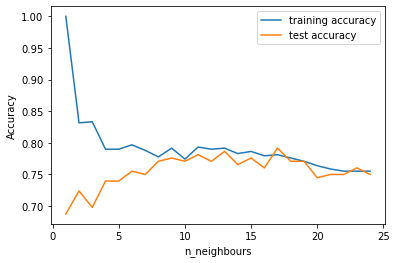

In [7]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbours_settings = range(1, 25)
for n_neighbours in n_neighbours_settings:
    knn = KNeighborsClassifier(n_neighbors = n_neighbours)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(n_neighbours_settings, training_accuracy, label='training accuracy')
plt.plot(n_neighbours_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel("n_neighbours")
plt.legend()

In [4]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
print("Accuracy on the training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on the training set: 0.792
Accuracy on the test set: 0.776


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 100).fit(X_train, y_train)
print("Accuracy on the training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on the training set: 0.783
Accuracy on the test set: 0.781


c:\users\boonkiat\pycharmprojects\pyshop\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
print("Accuracy on the training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training set: 0.773
Accuracy on the test set: 0.740


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0).fit(X_train, y_train)
print("Accuracy on the training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on the training set: 0.800
Accuracy on the test set: 0.755


In [24]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print("Accuracy on the training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on the test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on the training set: 0.77
Accuracy on the test set: 0.76


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc_scaled = SVC().fit(X_train_scaled, y_train)
print("Accuracy on the training set: {:.2f}".format(svc_scaled.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {:.2f}".format(svc_scaled.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.79
Accuracy on the test set: 0.80


In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print("Accuracy on the training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on the training set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on the training set: 0.731
Accuracy on the training set: 0.724


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp_scaled = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)
print("Accuracy on the training set: {:.3f}".format(mlp_scaled.score(X_train_scaled, y_train)))
print("Accuracy on the training set: {:.3f}".format(mlp_scaled.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.823
Accuracy on the training set: 0.802


c:\users\boonkiat\pycharmprojects\pyshop\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


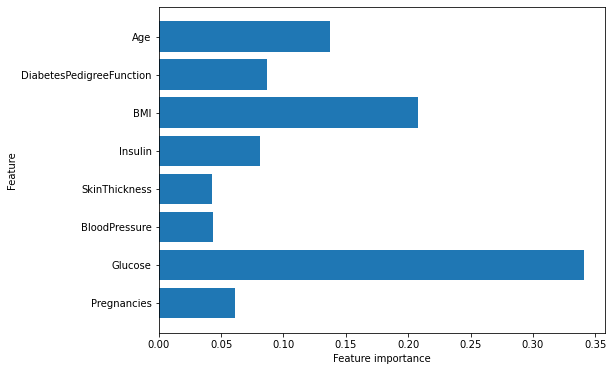

In [27]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8, 6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.ylabel('Feature')
    plt.xlabel('Feature importance')
    plt.yticks(np.arange(n_features), [x for i, x in enumerate(df.columns) if i!= 8])

plot_feature_importances_diabetes(rf)